### Importing Packages 

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

import itertools
import collections
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import bigrams
from nltk import trigrams
from nltk.util import ngrams
from IPython.display import display, HTML
import string
import re

import numpy as np
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

##### Reading Pre-Labelled Dataset 

In [ ]:
hs = pd.read_csv("labeled_data.csv")
hs = hs[["class","tweet"]]
hs = hs.rename(columns = {"class":"label" })
hs = hs[hs["label"].isin([0,2])]

In [ ]:
hs.head()

,label,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
40,2,""" momma said no pussy cats inside my doghouse """
63,2,"""@Addicted2Guys: -SimplyAddictedToGuys http://..."
66,2,"""@AllAboutManFeet: http://t.co/3gzUpfuMev"" woo..."
67,2,"""@Allyhaaaaa: Lemmie eat a Oreo &amp; do these..."


##### Checking the distribution of labels in the dataset

In [ ]:
hs.label.value_counts()

2    4163
0    1430
Name: label, dtype: int64

In [ ]:
X = hs.tweet
y = hs.label
print(X.shape)
print(y.shape)

(5593,)
(5593,)


##### Split data into training and test set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 1)
print(X_train.shape)
print(X_test.shape)

(4194,)
(1399,)


In [ ]:
vect = CountVectorizer()

In [ ]:
vect.fit(X_train)
X_train_dtm = vect.transform(X_train)

In [ ]:
X_train_dtm = vect.fit_transform(X_train)
X_train_dtm

<4194x13413 sparse matrix of type '<class 'numpy.int64'>'
	with 58602 stored elements in Compressed Sparse Row format>

In [ ]:
X_test_dtm = vect.transform(X_test)
X_test_dtm

<1399x13413 sparse matrix of type '<class 'numpy.int64'>'
	with 15988 stored elements in Compressed Sparse Row format>

##### Naive Bayes Model

In [ ]:
nb = MultinomialNB()

In [ ]:
%time nb.fit(X_train_dtm , y_train)

CPU times: total: 0 ns
Wall time: 5.55 ms


MultinomialNB()

In [ ]:
y_pred_class = nb.predict(X_test_dtm)

In [ ]:
metrics.accuracy_score(y_test,y_pred_class)

0.9185132237312366

In [ ]:
metrics.accuracy_score(y_train, nb.predict(X_train_dtm))

0.977587029089175

In [ ]:
cm =metrics.confusion_matrix(y_test, y_pred_class)
cm

array([[ 263,   86],
       [  28, 1022]], dtype=int64)

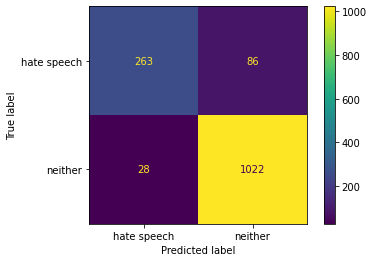

In [ ]:
cmd = metrics.ConfusionMatrixDisplay(cm, display_labels = ['hate speech','neither'])
cmd.plot()
plt.savefig("Confusion_Matrix_NB.png")

##### False Positives

In [ ]:
X_test[y_test < y_pred_class]

7110     @t5_harris Are you working on route running an...
6529     @kristin12909 better nig. Lol but if anything ...
15055    RT @Drizz_LakerKing: Horrible RT @YeIIowbang: ...
6171     @infidelpamelaLC I'm going to blame the black ...
9357     GEEZ..... I think #NorthKorea may be right. #B...
                               ...                        
1224     &#8220;@DickFurari: HELL YA THEY SHOULD MAKE M...
4391                      @PatriotsOrg Screw the ragheads.
13460      Not trying to follow any spooks, no offense ...
219      "@RTNBA: Drakes new shoes that will be release...
23246                               You are a jiggaboo...!
Name: tweet, Length: 86, dtype: object

In [ ]:
X_test[y_test > y_pred_class]

5917      @elchavaloko pinche panamonos negros me Dan asco
5923     @elise_palmer youre cheating on mickey bubbles...
220      "@RachieSoul: @DizzleOfficial inna di ghetto!!...
23375    You losing 0-3 @sterling31 and that's what u t...
2611     @Bitterchick \nDare be only one bag dat folks ...
24218                               money hoes and clothes
5011                        @ToWherever yay im a whitey :3
14259    RT @BARRYCLERJUSTE: Whatchu sayin hoe, YOU KNO...
5941     @eruditetina @Orgleader Hey @RevJJackson why d...
16611    RT @NavyAssLos: Hunter Hurt Helmsley RT @Rich_...
2699     @Buckm00se @Cuauhtli02 we gunna laff at Chava/...
17447    RT @Steven_ratata: @savanigga @CheersToKellin ...
2624     @Blackman38Tide bandana Orian. They called me ...
12220    Kentucky Fried cater to da white folk. No colo...
6346     @karmendanielle_ aka he wanna keep you warm, s...
11301                           I'm jus a trill nicca mane
11689    If you're not directly descended from European.

In [ ]:
X_test[12220]

'Kentucky Fried cater to da white folk. No colored menu'

In [ ]:
y_pred_prob = nb.predict_proba(X_test_dtm)[:,1]
y_pred_prob

array([0.99999576, 0.92945122, 0.9907294 , ..., 0.99995761, 0.42572336,
       0.97747481])

In [ ]:
metrics.roc_auc_score(y_test, y_pred_prob)

0.9585100286532952

##### Using Logistic Regression

In [ ]:
logreg = LogisticRegression()

In [ ]:
%time logreg.fit(X_train_dtm, y_train)

CPU times: total: 281 ms
Wall time: 321 ms


LogisticRegression()

In [ ]:
y_pred_class = logreg.predict(X_test_dtm)

In [ ]:
y_pred_prob = logreg.predict_proba(X_test_dtm)[:,1]
y_pred_prob

array([0.98837581, 0.97234163, 0.89894635, ..., 0.98381808, 0.03144595,
       0.95281035])

In [ ]:
metrics.accuracy_score(y_test, y_pred_class)

0.9399571122230165

In [ ]:
metrics.roc_auc_score(y_test, y_pred_prob)

0.9699522445081186

##### How often are token's used in each label?

In [ ]:
X_train_tokens = vect.get_feature_names_out()
len(X_train_tokens)

13413

In [ ]:
print(X_train_tokens[0:50])

['00' '000' '007' '007beardownjedi' '007hertzrumble' '00pm' '00sexilexi00'
 '02' '0221' '02e1ceoe3z' '05professor' '06' '07cannon' '08' '0kkaren'
 '0lowkclb' '0lrablmhb2' '0ntcwbrmmk' '0panscimew' '0ushmogzdr'
 '0xabad1dea' '0xdlxtoci8' '0xhpbrl9eq' '0xkfnw3luf' '10' '100' '100000'
 '1000x' '10024' '10052' '10071' '10084' '100gram' '100x' '1041191'
 '1041196' '1041219' '1043215' '1043358' '105' '1069thearrow' '107' '10am'
 '10k' '10xs' '10yadnrfks' '11' '11015' '12' '121']


In [ ]:
print(X_train_tokens[-50:])

['zelfde' 'zero' 'zertec' 'zhandlen' 'zibllnm1zs' 'zibnjmiilj' 'zich'
 'zigeuner' 'zihni' 'zij' 'zijn' 'zimas' 'zimmerman' 'zion' 'zionist'
 'zip' 'zipperheads' 'zitlalyl' 'zj1mk6w7ef' 'zjdlwiajeo' 'zjjyrgcz9y'
 'zlatan' 'zlpfzsitom' 'zmkwgnzoct' 'zmlokfwdql' 'zoals' 'zoe' 'zolang'
 'zombie' 'zombies' 'zonedmoan' 'zones' 'zookeeper' 'zooyorkinit' 'zp3_'
 'zptckqybam' 'zs05enjjwm' 'zsaazfl0p5' 'zt0mm' 'zt_supreme' 'zuai7qwbir'
 'zucchini' 'zukwj2ve2d' 'zv1cpk1iy8' 'zvjroxgndq' 'zwaaad' 'zwithr'
 'zzachbarness' 'zzzquil' 'zzzzzz']


In [ ]:
nb.feature_count_.shape

(2, 13413)

In [ ]:
hate_speech_token_count = nb.feature_count_[0,:]
hate_speech_token_count

array([0., 0., 0., ..., 0., 0., 1.])

In [ ]:
neutral_speech_token_count = nb.feature_count_[1,:]
neutral_speech_token_count

array([3., 4., 1., ..., 1., 1., 0.])

In [ ]:
tokens = pd.DataFrame({'token':X_train_tokens, 'hate_speech':hate_speech_token_count,'neutral_speech':neutral_speech_token_count}).set_index('token')

In [ ]:
tokens.head()

,hate_speech,neutral_speech
token,,
00,0.0,3.0
000,0.0,4.0
007,0.0,1.0
007beardownjedi,0.0,1.0
007hertzrumble,0.0,1.0


In [ ]:
tokens.sample(5, random_state = 6)

,hate_speech,neutral_speech
token,,
kidnap,0.0,1.0
egypt,0.0,2.0
coverage,0.0,2.0
cotton,2.0,2.0
shanetallant,0.0,1.0


In [ ]:
tokens['hate_speech'] = tokens.hate_speech + 1
tokens['neutral_speech'] = tokens.neutral_speech + 1
tokens.sample(5, random_state = 6)

,hate_speech,neutral_speech
token,,
kidnap,1.0,2.0
egypt,1.0,3.0
coverage,1.0,3.0
cotton,3.0,3.0
shanetallant,1.0,2.0


In [ ]:
nb.class_count_

array([1081., 3113.])

In [ ]:
tokens['hate_speech'] = tokens.hate_speech/ nb.class_count_[0]
tokens['neutral_speech'] = tokens.neutral_speech/ nb.class_count_[1]
tokens.sample(5, random_state = 6)

,hate_speech,neutral_speech
token,,
kidnap,0.000925,0.000642
egypt,0.000925,0.000964
coverage,0.000925,0.000964
cotton,0.002775,0.000964
shanetallant,0.000925,0.000642


In [ ]:
tokens['hate_ratio'] = tokens.hate_speech / tokens.neutral_speech
tokens.sample(5, random_state = 6)

,hate_speech,neutral_speech,hate_ratio
token,,,
kidnap,0.000925,0.000642,1.439870
egypt,0.000925,0.000964,0.959914
coverage,0.000925,0.000964,0.959914
cotton,0.002775,0.000964,2.879741
shanetallant,0.000925,0.000642,1.439870


In [ ]:
tokens.sort_values('hate_ratio', ascending = False).head(50)


,hate_speech,neutral_speech,hate_ratio
token,,,
faggot,0.128585,0.000321,400.283996
nigga,0.090657,0.000321,282.214616
fuck,0.083256,0.000321,259.176688
fucking,0.072155,0.000321,224.619796
niggas,0.059204,0.000321,184.303423
niggers,0.042553,0.000321,132.468085
nigger,0.079556,0.000642,123.828862
bitches,0.038853,0.000321,120.949121
ass,0.092507,0.000964,95.991366


##### N-GRAM MODEL

In [ ]:
hs = pd.read_csv("labeled_data.csv")
hs = hs[["class","tweet"]]
hs = hs.rename(columns = {"class":"label" })
hs = hs[hs["label"].isin([0])]

In [ ]:
word_list = [re.sub(r'[^\w\s]', '', tweet.lower()).split() for tweet in hs['tweet']]



In [ ]:
additional_sw = ["u","9733","spa","massage","best","rated","slope","park","top","rt","7186220221","24","97339733973397339733","grand","opening","charlie4927","stacydmomof5","revkahjc"] + list(itertools.chain(*string.punctuation))
tweets_cleaned = [[w for w in word if not w in stopwords.words('english') + additional_sw] for word in word_list]


In [1]:
all_word_list_2 = list(itertools.chain(*tweets_cleaned))

count_word = collections.Counter(all_word_list_2)

count_word.most_common(10)

NameError: ignored

In [ ]:
terms_bigram = [list(bigrams(tweet)) for tweet in tweets_cleaned]

bigrams = list(itertools.chain(*terms_bigram))

bigram_counts = collections.Counter(bigrams)

bigram_df = pd.DataFrame(bigram_counts.most_common(10), columns = ['Bigram', 'Count'])

display(bigram_df.head(20))

,Bigram,Count
0,"(white, trash)",61
1,"(ass, nigga)",23
2,"(look, like)",17
3,"(bitch, ass)",14
4,"(youre, faggot)",11
5,"(fucking, faggot)",11
6,"(full, white)",10
7,"(faggot, ass)",10
8,"(looks, like)",9
9,"(fuck, bitch)",8


In [ ]:
terms_trigram = [list(trigrams(tweet)) for tweet in tweets_cleaned]

trigrams = list(itertools.chain(*terms_trigram))

trigram_counts = collections.Counter(trigrams)

trigram_df = pd.DataFrame(trigram_counts.most_common(10), columns = ['Trigram', 'Count'])

display(trigram_df.head(20))

,Trigram,Count
0,"(full, white, trash)",10
1,"(bitch, ass, nigga)",7
2,"(nigga, nigga, nigga)",4
3,"(many, niggers, store)",4
4,"(creepy, ass, cracker)",3
5,"(da, colored, folk)",3
6,"(happy, birthday, faggot)",3
7,"(softestmuffin, _tee13, torahblaze)",3
8,"(theyre, white, trash)",3
9,"(pussy, ass, nigga)",3


In [ ]:
terms_ngram = [list(ngrams(tweet,5)) for tweet in tweets_cleaned]

ngrams = list(itertools.chain(*terms_ngram))

ngram_counts = collections.Counter(ngrams)

ngram_df = pd.DataFrame(ngram_counts.most_common(10), columns = ['Ngram', 'Count'])

display(ngram_df.head(20))

,Ngram,Count
0,"(whatever, fuck, assholes, theyre, niggers)",2
1,"(fuck, assholes, theyre, niggers, look)",2
2,"(assholes, theyre, niggers, look, alike)",2
3,"(little, isis, faggots, usually, bags)",2
4,"(isis, faggots, usually, bags, heads)",2
5,"(faggots, usually, bags, heads, anyway)",2
6,"(faux, noise, pundits, dont, like)",2
7,"(noise, pundits, dont, like, duck)",2
8,"(pundits, dont, like, duck, molester)",2
9,"(dont, like, duck, molester, proslavery)",2


##### TF-IDF

In [ ]:
count = CountVectorizer()
word_count = count.fit_transform(hs["tweet"])

In [ ]:
print(word_count)

  (0, 597)	1
  (0, 4692)	1
  (0, 2036)	1
  (0, 3436)	1
  (0, 1711)	1
  (1, 805)	1
  (1, 4710)	1
  (1, 293)	1
  (1, 1948)	2
  (1, 514)	1
  (1, 3910)	1
  (1, 4856)	1
  (1, 767)	1
  (1, 4228)	1
  (1, 2756)	1
  (2, 4856)	1
  (2, 1209)	1
  (2, 4571)	1
  (2, 3492)	1
  (2, 1660)	1
  (2, 1707)	1
  (2, 596)	1
  (2, 1988)	1
  (2, 1991)	1
  (2, 3150)	1
  :	:
  (1427, 2189)	1
  (1427, 2996)	2
  (1427, 404)	1
  (1427, 3425)	1
  (1427, 2429)	1
  (1428, 4856)	1
  (1428, 3492)	1
  (1428, 3008)	1
  (1428, 280)	1
  (1429, 4856)	3
  (1429, 3492)	1
  (1429, 1660)	1
  (1429, 315)	1
  (1429, 1481)	1
  (1429, 1729)	1
  (1429, 3564)	1
  (1429, 1226)	1
  (1429, 1641)	1
  (1429, 2021)	1
  (1429, 4122)	1
  (1429, 4480)	1
  (1429, 1215)	1
  (1429, 4132)	1
  (1429, 3654)	1
  (1429, 1120)	1


In [ ]:
word_count.shape

(1430, 4904)

In [ ]:
print(word_count.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(word_count)
df_idf = pd.DataFrame(tfidf_transformer.idf_, index=count.get_feature_names_out(),columns=["idf_weights"])

In [ ]:
#inverse document frequency
df_idf.sort_values(by=['idf_weights'])


,idf_weights
you,2.349927
the,2.497808
rt,2.572397
to,2.660327
and,2.928591
...,...
hills,7.572982
himself,7.572982
hindis,7.572982
hester,7.572982


In [ ]:
#tfidf
tf_idf_vector=tfidf_transformer.transform(word_count)
feature_names = count.get_feature_names_out()

In [ ]:
first_document_vector=tf_idf_vector[1]
df_tfifd= pd.DataFrame(first_document_vector.T.todense(), index=feature_names, columns=["tfidf"])

In [ ]:
df_tfifd.sort_values(by=["tfidf"],ascending=False)

,tfidf
hes,0.599424
alsarabsss,0.340967
cb_baby24,0.340967
white_thunduh,0.309759
mexican,0.291503
...,...
fried,0.000000
friday,0.000000
freshman,0.000000
freedom,0.000000
